In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_csv('income_survey.csv')
df

,Unnamed: 0,wages,education,age,sex,language
0,1,10.56,15.0,40,Male,English
1,2,11.00,13.2,19,Male,English
2,3,NaN,16.0,49,Male,Other
3,4,17.76,14.0,46,Male,Other
4,5,NaN,8.0,71,Male,English
...,...,...,...,...,...,...
7420,7421,NaN,8.0,73,Male,Other
7421,7422,30.49,16.0,52,Male,Other
7422,7423,22.00,15.0,41,Male,Other
7423,7424,11.85,11.0,47,Female,English


In [36]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0       0
wages         3278
education      249
age              0
sex              0
language       121
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7425 non-null   int64  
 1   wages       4147 non-null   float64
 2   education   7176 non-null   float64
 3   age         7425 non-null   int64  
 4   sex         7425 non-null   object 
 5   language    7304 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 348.2+ KB


C:\Users\0002168344\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wages'>

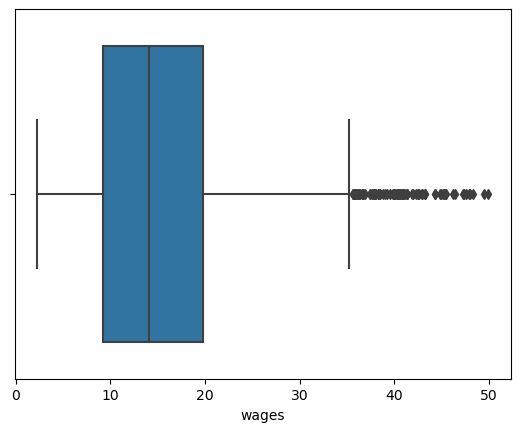

In [38]:
sns.boxplot(df.wages)

C:\Users\0002168344\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wages', ylabel='Density'>

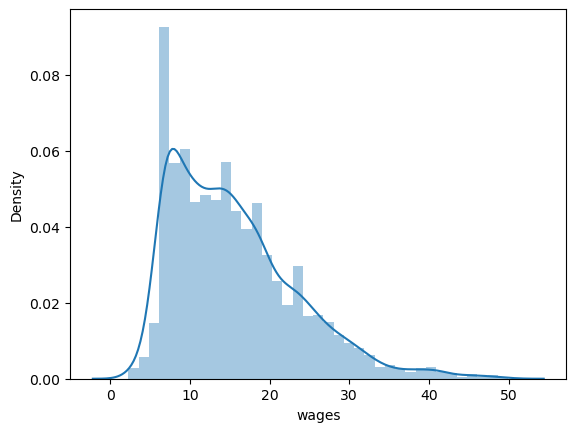

In [39]:
sns.distplot(df.wages)

In [40]:
df['wages'].fillna(df['wages'].median(), inplace=True)

C:\Users\0002168344\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education'>

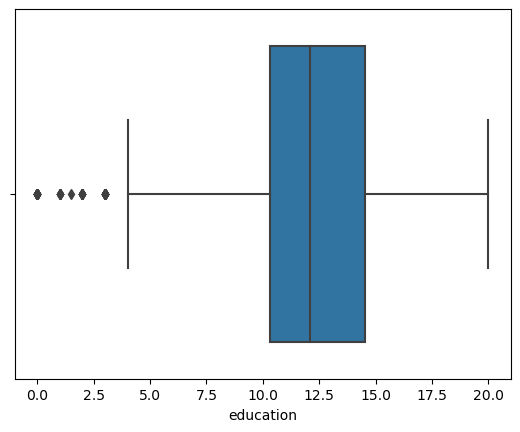

In [41]:
sns.boxplot(df.education)

C:\Users\0002168344\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

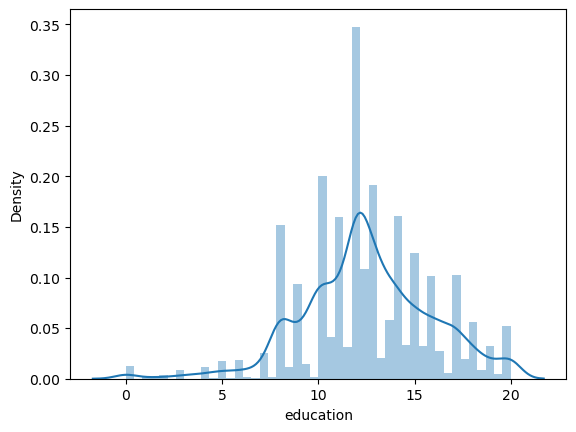

In [42]:
sns.distplot(df.education)

In [43]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['language'].fillna('Unknown', inplace=True)
df['language'] = df['language'].astype(str)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
df.head


<bound method NDFrame.head of       wages  education  age     sex language
0     10.56       15.0   40    Male  English
1     11.00       13.2   19    Male  English
2     14.09       16.0   49    Male    Other
3     17.76       14.0   46    Male    Other
4     14.09        8.0   71    Male  English
...     ...        ...  ...     ...      ...
7420  14.09        8.0   73    Male    Other
7421  30.49       16.0   52    Male    Other
7422  22.00       15.0   41    Male    Other
7423  11.85       11.0   47  Female  English
7424  23.00       14.0   30    Male  English

[7425 rows x 5 columns]>

In [45]:
df.describe()

,wages,education,age
count,7425.000000,7425.000000,7425.000000
mean,14.907158,12.479448,43.982761
std,5.935660,3.306843,17.694554
min,2.300000,0.000000,16.000000
25%,13.070000,10.500000,30.000000
50%,14.090000,12.000000,41.000000
75%,15.000000,14.500000,57.000000
max,49.920000,20.000000,95.000000


In [50]:
df.dtypes


wages        float64
education    float64
age            int64
sex           object
language      object
dtype: object

In [46]:
df.groupby('language')['wages'].value_counts()

language  wages
English   14.09    2394
          7.00       84
          6.70       66
          10.00      54
          12.00      50
                   ... 
Unknown   30.65       1
          31.20       1
          34.23       1
          40.45       1
          42.31       1
Name: wages, Length: 1947, dtype: int64

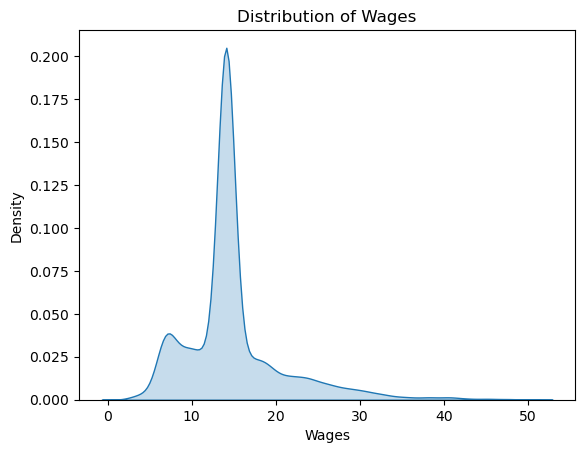

In [47]:
sns.kdeplot(df['wages'], shade=True)
plt.xlabel('Wages')
plt.ylabel('Density')
plt.title('Distribution of Wages')
plt.show()

<AxesSubplot:xlabel='language', ylabel='count'>

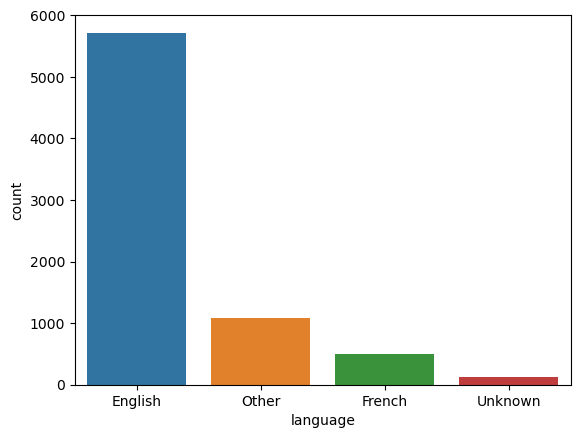

In [48]:
sns.countplot(x=df["language"])

ValueError: invalid literal for int() with base 10: 'Male'

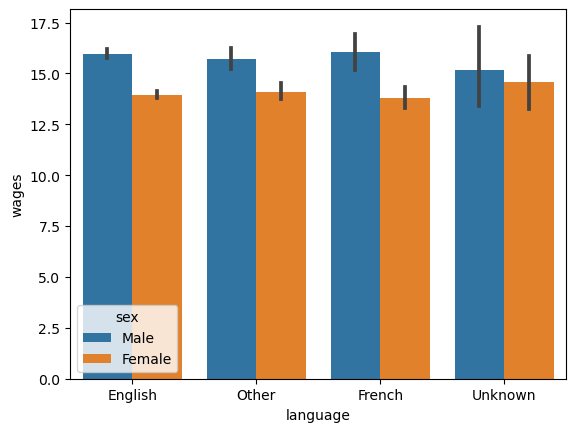

In [51]:

sex_labels = {0: "Male", 1: "Female"}

# Create the bar plot
sns.barplot(data=df, x="language", y="wages", hue="sex")

# Modify the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [sex_labels[int(label)] for label in labels])

# Display the plot
plt.show()

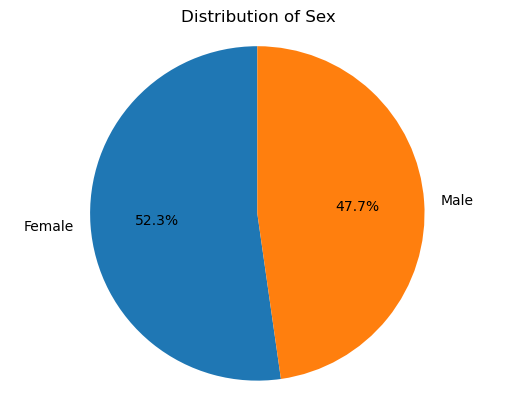

In [52]:
gender = df['sex'].value_counts()

# Define labels for the pie chart
labels = ['Female', 'Male']

# Create the pie chart
plt.pie(gender, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Distribution of Sex')

# Display the pie chart
plt.axis('equal')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

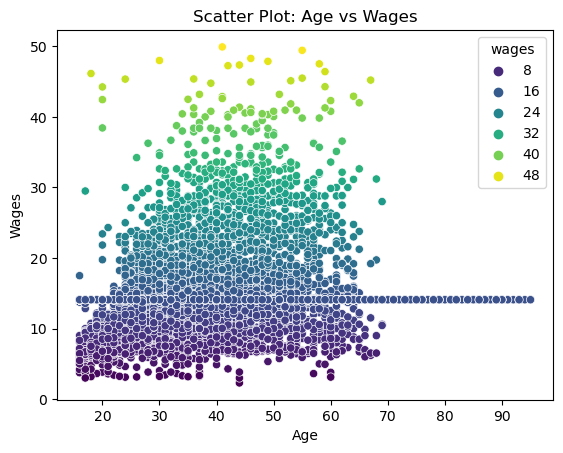

In [59]:
sns.scatterplot(data=df, x='age', y='wages', hue='wages', palette='viridis')

# Set axis labels
plt.xlabel('Age')
plt.ylabel('Wages')

# Set plot title
plt.title('Scatter Plot: Age vs Wages')

# Add colorbar
plt.colorbar(label='Wages')

# Display the plot
plt.show()


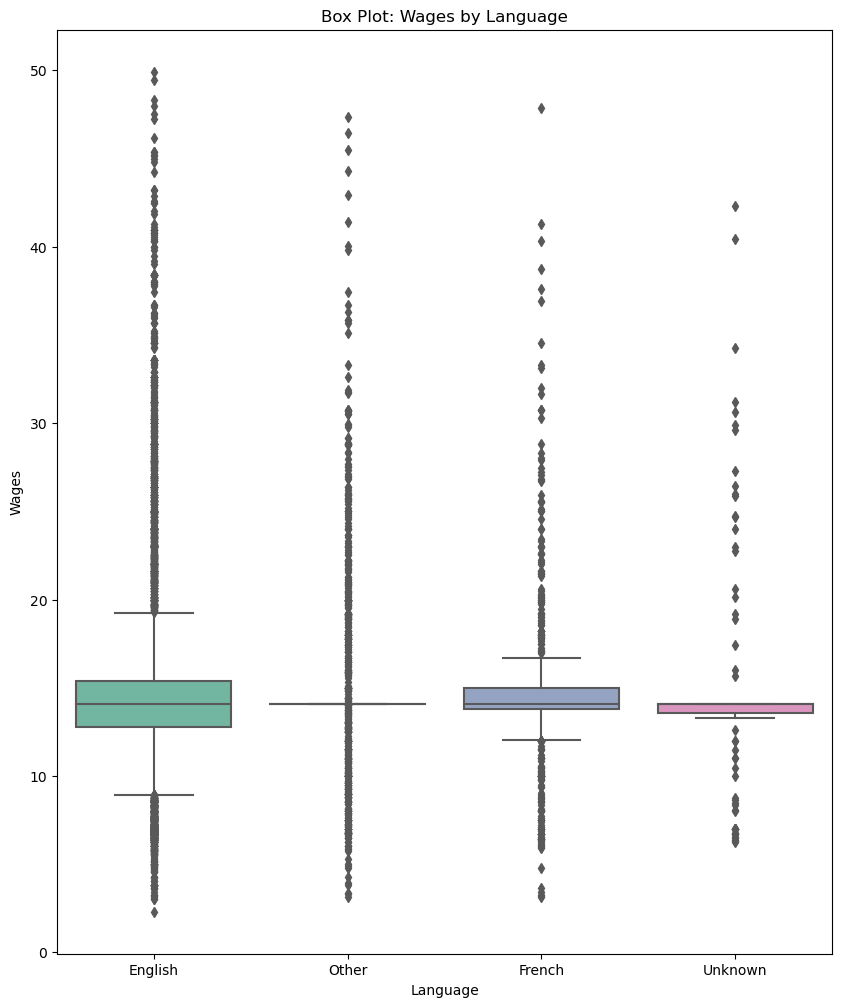

In [60]:

plt.figure(figsize=(10, 12))
#box plot
sns.boxplot(data=df, x="language", y="wages", palette ='Set2')

# Set axis labels
plt.xlabel('Language')
plt.ylabel('Wages')

# Set plot title
plt.title('Box Plot: Wages by Language')

# Display the plot
plt.show()

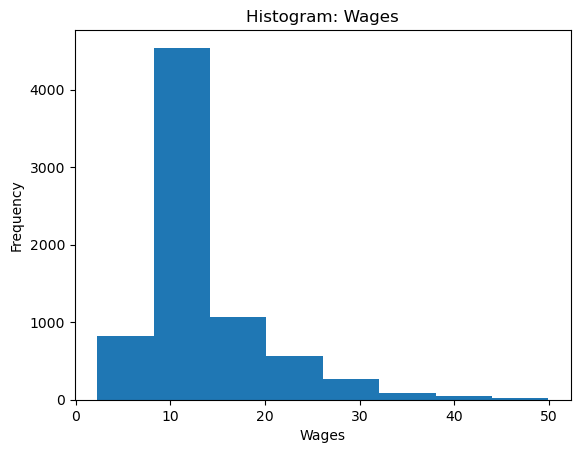

In [58]:
plt.hist(df['wages'], bins=8)

# Set axis labels
plt.xlabel('Wages')
plt.ylabel('Frequency')

# Set plot title
plt.title('Histogram: Wages')

# Display the plot
plt.show()
